# Analyze data from education systems

In [1]:
from math import prod
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

## Methods cell

In [2]:
def df_initial_analysis(df, name_df):
    """
    Initial analysis on the DataFrame.

    Args:
        df (pandas.DataFrame): DataFrame to analyze.
        name_df (str): DataFrame name.

    Returns:
        None.
        Print the initial analysis on the DataFrame. 
    """
    if df.empty:
        print("The", name_df, "dataset is empty. Please verify the file.")
    else:
        empty_cols = [col for col in df.columns if df[col].isna().all()] # identifying empty columns
        df_rows_duplicates = df[df.duplicated()] #identifying full duplicates rows
        
        # Creating a dataset based on Type object and records by columns
        type_cols = country.dtypes.apply(lambda x: x.name).to_dict() 
        df_resume = pd.DataFrame(list(type_cols.items()), columns = ["Name", "Type"])
        df_resume["Records"] = list(country.count())
        
        print("\nInitial Analysis of", name_df, "dataset")
        print("--------------------------------------------------------------------------")
        print("- Dataset shape:                 ", df.shape[0], "rows and", df.shape[1], "columns")
        print("- Total of NaN values:           ", df.isna().sum().sum())
        print("- Percentage of NaN:             ", round((df.isna().sum().sum() / prod(df.shape)) * 100, 2), "%")
        print("- Total of full duplicates rows: ", df_rows_duplicates.shape[0])
        print("- Total of empty columns:        ", len(empty_cols))
        print(" + The empty column is:          ", empty_cols) if len(empty_cols) == 1 \
            else (print(" + The empty column are:          ", empty_cols) if len(empty_cols) >= 1 else None)
        print("\n- Type object and records by columns")
        print("--------------------------------------------------------------------------")
        print(df_resume.sort_values("Records", ascending=False))

## Loading data

In [3]:
# loading Dataset and removing the empty columns (the empty columns, unnamed, etc.)
country = pd.read_csv("datasets/EdStatsCountry.csv")
serie = pd.read_csv("datasets/EdStatsSeries.csv")
country_serie = pd.read_csv("datasets/EdStatsCountry-Series.csv")
foot_note = pd.read_csv("datasets/EdStatsFootNote.csv")
data = pd.read_csv("datasets/EdStatsData.csv")

## Initial data analysis

- Knowing the entities of the datasets.<br>

    - **Country** dataset **`"EdStatsCountry.csv"`**.<br>
    Des renseignements en général sur l'économie de chaque pays du monde.
    
    - **Serie** dataset **`"EdStatsSeries.csv"`**.<br>
    Des renseignements en peu plus de détails sur les indicateurs économiques.
    
    - **Country-Serie** dataset **`"EdStatsCountry-Series.csv"`**.<br>
    La source des données sur l'information relationnelle entre **`"EdStatsCountry.csv"`** et **`"EdStatsSeries.csv"`**.

    - **Foot Note** dataset **`"EdStatsFootNote.csv"`**.<br>
    L’année d’origine des données et aussi une description sur les indicateurs.

    - **Data** dataset **`"EdStatsData.csv"`**.<br>
    Le dataset principal qui contient en détails le renseignement sur les indicateurs par an.

- Entity relationship diagram.<br>
<br>Il existe une relation entre les datasets à travers les colonnes **`"Country Code"`** et **`"Series Code"`** principalement.
![Entity relationship diagram](img/entity_relationship.png)

### Country dataset

In [4]:
country.head(3)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN


In [5]:
# Describing the numeric columns
country.describe()

,National accounts reference year,Latest industrial data,Latest trade data,Unnamed: 31
count,32.00000,107.000000,185.000000,0.0
mean,2001.53125,2008.102804,2010.994595,NaN
std,5.24856,2.616834,2.569675,NaN
min,1987.00000,2000.000000,1995.000000,NaN
25%,1996.75000,2007.500000,2011.000000,NaN
50%,2002.00000,2009.000000,2012.000000,NaN
75%,2005.00000,2010.000000,2012.000000,NaN
max,2012.00000,2010.000000,2012.000000,NaN


In [6]:
# Resume of dataset
df_initial_analysis(country, "country")


Initial Analysis of country dataset
--------------------------------------------------------------------------
- Dataset shape:                  241 rows and 32 columns
- Total of NaN values:            2354
- Percentage of NaN:              30.52 %
- Total of full duplicates rows:  0
- Total of empty columns:         1
 + The empty column is:           ['Unnamed: 31']

- Type object and records by columns
--------------------------------------------------------------------------
                                                 Name     Type  Records
0                                        Country Code   object      241
3                                           Long Name   object      241
1                                          Short Name   object      241
2                                          Table Name   object      241
9                                           WB-2 code   object      240
4                                        2-alpha code   object      238
5         

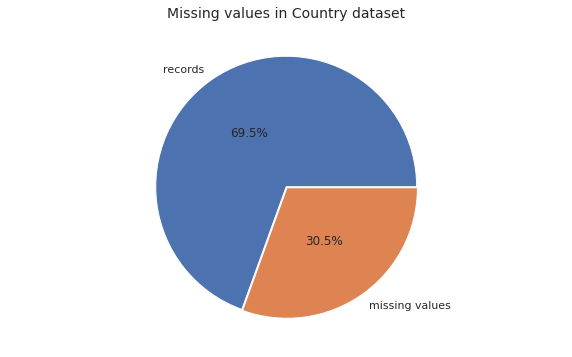

In [7]:
# Drawing missing values in Country dataset
labels = ["records", "missing values"]
vals = [prod(country.shape)-country.isna().sum().sum(), country.isna().sum().sum()]
explode = (0, 0.01)

pie, ax = plt.subplots(figsize=[10,6])
plt.axis("equal")
plt.pie(x=vals, labels=labels, explode=explode,  autopct="%.1f%%", pctdistance=0.5)
plt.title("Missing values in Country dataset", fontsize=14)
plt.show()

### Serie dataset

In [8]:
serie.head(3)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Describing the numeric columns
serie.describe()

,Unit of measure,Notes from original source,Other web links,Related indicators,License Type,Unnamed: 20
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Resume of dataset
df_initial_analysis(serie, "serie")


Initial Analysis of serie dataset
--------------------------------------------------------------------------
- Dataset shape:                  3665 rows and 21 columns
- Total of NaN values:            55203
- Percentage of NaN:              71.72 %
- Total of full duplicates rows:  0
- Total of empty columns:         6
 + The empty column are:           ['Unit of measure', 'Notes from original source', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20']

- Type object and records by columns
--------------------------------------------------------------------------
                                                 Name     Type  Records
0                                        Country Code   object      241
3                                           Long Name   object      241
1                                          Short Name   object      241
2                                          Table Name   object      241
9                                           WB-

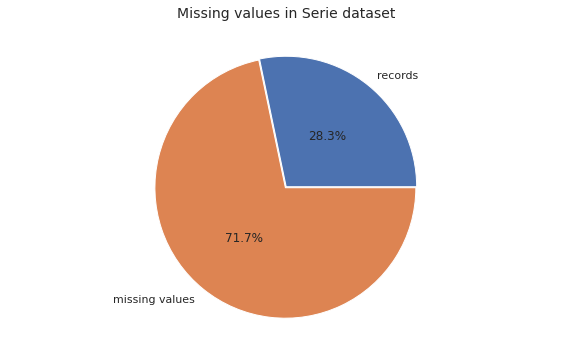

In [11]:
# Drawing missing values in Serie dataset
labels = ["records", "missing values"]
vals = [prod(serie.shape)-serie.isna().sum().sum(), serie.isna().sum().sum()]
explode = (0, 0.01)

pie, ax = plt.subplots(figsize=[10,6])
plt.axis("equal")
plt.pie(x=vals, labels=labels, explode=explode,  autopct="%.1f%%", pctdistance=0.5)
plt.title("Missing values in Serie dataset", fontsize=14)
plt.show()

### Country-Serie dataset

In [12]:
country_serie.head(3)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [13]:
# Resume of dataset
df_initial_analysis(country_serie, "country_serie")


Initial Analysis of country_serie dataset
--------------------------------------------------------------------------
- Dataset shape:                  613 rows and 4 columns
- Total of NaN values:            613
- Percentage of NaN:              25.0 %
- Total of full duplicates rows:  0
- Total of empty columns:         1
 + The empty column is:           ['Unnamed: 3']

- Type object and records by columns
--------------------------------------------------------------------------
                                                 Name     Type  Records
0                                        Country Code   object      241
3                                           Long Name   object      241
1                                          Short Name   object      241
2                                          Table Name   object      241
9                                           WB-2 code   object      240
4                                        2-alpha code   object      238
5       

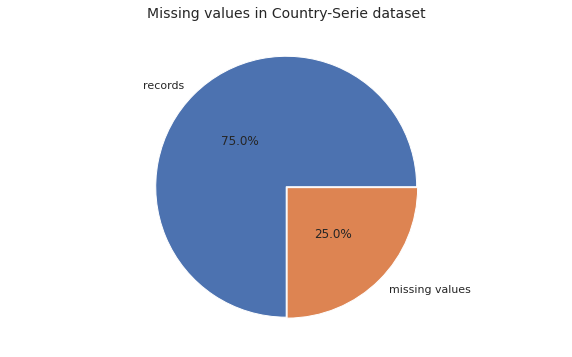

In [14]:
# Drawing missing values in Country-Serie dataset
labels = ["records", "missing values"]
vals = [prod(country_serie.shape)-country_serie.isna().sum().sum(), country_serie.isna().sum().sum()]
explode = (0, 0.01)

pie, ax = plt.subplots(figsize=[10,6])
plt.axis("equal")
plt.pie(x=vals, labels=labels, explode=explode,  autopct="%.1f%%", pctdistance=0.5)
plt.title("Missing values in Country-Serie dataset", fontsize=14)
plt.show()

### Foot Note dataset

In [15]:
foot_note.head(3)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN


In [16]:
# Describing the numeric columns
foot_note.describe()

,Unnamed: 4
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [17]:
# Resume of dataset
df_initial_analysis(foot_note, "foot_note")


Initial Analysis of foot_note dataset
--------------------------------------------------------------------------
- Dataset shape:                  643638 rows and 5 columns
- Total of NaN values:            643638
- Percentage of NaN:              20.0 %
- Total of full duplicates rows:  0
- Total of empty columns:         1
 + The empty column is:           ['Unnamed: 4']

- Type object and records by columns
--------------------------------------------------------------------------
                                                 Name     Type  Records
0                                        Country Code   object      241
3                                           Long Name   object      241
1                                          Short Name   object      241
2                                          Table Name   object      241
9                                           WB-2 code   object      240
4                                        2-alpha code   object      238
5     

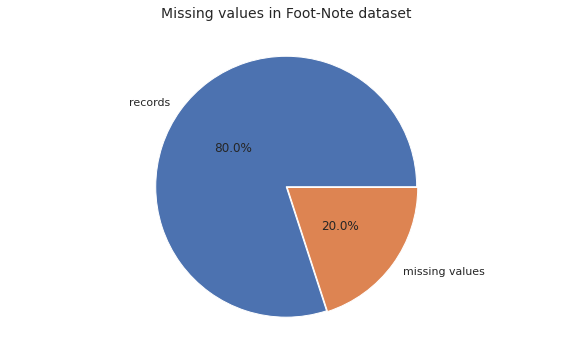

In [18]:
# Drawing missing values in Foot Note dataset
labels = ["records", "missing values"]
vals = [prod(foot_note.shape)-foot_note.isna().sum().sum(), foot_note.isna().sum().sum()]
explode = (0, 0.01)

pie, ax = plt.subplots(figsize=[10,6])
plt.axis("equal")
plt.pie(x=vals, labels=labels, explode=explode,  autopct="%.1f%%", pctdistance=0.5)
plt.title("Missing values in Foot-Note dataset", fontsize=14)
plt.show()

### Data dataset

In [19]:
data.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Describing the numeric columns
data.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


In [21]:
# Resume of dataset
df_initial_analysis(data, "data")


Initial Analysis of data dataset
--------------------------------------------------------------------------
- Dataset shape:                  886930 rows and 70 columns
- Total of NaN values:            53455179
- Percentage of NaN:              86.1 %
- Total of full duplicates rows:  0
- Total of empty columns:         1
 + The empty column is:           ['Unnamed: 69']

- Type object and records by columns
--------------------------------------------------------------------------
                                                 Name     Type  Records
0                                        Country Code   object      241
3                                           Long Name   object      241
1                                          Short Name   object      241
2                                          Table Name   object      241
9                                           WB-2 code   object      240
4                                        2-alpha code   object      238
5      

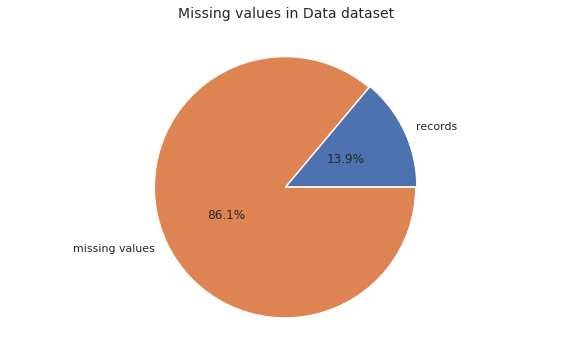

In [22]:
# Drawing missing values in Data dataset
labels = ["records", "missing values"]
vals = [prod(data.shape)-data.isna().sum().sum(), data.isna().sum().sum()]
explode = (0, 0.01)

pie, ax = plt.subplots(figsize=[10,6])
plt.axis("equal")
plt.pie(x=vals, labels=labels, explode=explode,  autopct="%.1f%%", pctdistance=0.5)
plt.title("Missing values in Data dataset", fontsize=14)
plt.show()

## Data cleanup

* Deleting empty columns and empty rows
* Filtring by list of countries as given in ISO 3166-1 and the corresponding ISO 3166-1-alpha-2 code elements.<br/>
https://datahub.io/core/country-list#resource-data

In [23]:
# loading Dataset and removing the empty columns (the empty columns, unnamed, etc.)
country = pd.read_csv("datasets/EdStatsCountry.csv").dropna(axis="columns", how="all").dropna(axis="rows", how="all")
#country = pd.read_csv("datasets/EdStatsCountry.csv").dropna(axis="columns", how="all").dropna(axis="rows", how="all")
#country#


serie = pd.read_csv("datasets/EdStatsSeries.csv").dropna(how='all', axis='columns')
country_serie = pd.read_csv("datasets/EdStatsCountry-Series.csv").dropna(how='all', axis='columns')
foot_note = pd.read_csv("datasets/EdStatsFootNote.csv").dropna(how='all', axis='columns')
data = pd.read_csv("datasets/EdStatsData.csv").dropna(how='all', axis='columns')

In [24]:
df_initial_analysis(country, "country")


Initial Analysis of country dataset
--------------------------------------------------------------------------
- Dataset shape:                  241 rows and 31 columns
- Total of NaN values:            2113
- Percentage of NaN:              28.28 %
- Total of full duplicates rows:  0
- Total of empty columns:         0

- Type object and records by columns
--------------------------------------------------------------------------
                                                 Name     Type  Records
0                                        Country Code   object      241
2                                          Table Name   object      241
3                                           Long Name   object      241
1                                          Short Name   object      241
9                                           WB-2 code   object      240
4                                        2-alpha code   object      238
15                        System of National Accounts   obje

In [25]:
df_initial_analysis(serie, "serie")


Initial Analysis of serie dataset
--------------------------------------------------------------------------
- Dataset shape:                  3665 rows and 15 columns
- Total of NaN values:            33213
- Percentage of NaN:              60.41 %
- Total of full duplicates rows:  0
- Total of empty columns:         0

- Type object and records by columns
--------------------------------------------------------------------------
                                                 Name     Type  Records
0                                        Country Code   object      241
2                                          Table Name   object      241
3                                           Long Name   object      241
1                                          Short Name   object      241
9                                           WB-2 code   object      240
4                                        2-alpha code   object      238
15                        System of National Accounts   obje

In [26]:
df_initial_analysis(country_serie, "country_serie")


Initial Analysis of country_serie dataset
--------------------------------------------------------------------------
- Dataset shape:                  613 rows and 3 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty columns:         0

- Type object and records by columns
--------------------------------------------------------------------------
                                                 Name     Type  Records
0                                        Country Code   object      241
2                                          Table Name   object      241
3                                           Long Name   object      241
1                                          Short Name   object      241
9                                           WB-2 code   object      240
4                                        2-alpha code   object      238
15                        System of National Accounts   obje

In [27]:
df_initial_analysis(foot_note, "foot_note")


Initial Analysis of foot_note dataset
--------------------------------------------------------------------------
- Dataset shape:                  643638 rows and 4 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty columns:         0

- Type object and records by columns
--------------------------------------------------------------------------
                                                 Name     Type  Records
0                                        Country Code   object      241
2                                          Table Name   object      241
3                                           Long Name   object      241
1                                          Short Name   object      241
9                                           WB-2 code   object      240
4                                        2-alpha code   object      238
15                        System of National Accounts   objec

In [28]:
df_initial_analysis(data, "data")


Initial Analysis of data dataset
--------------------------------------------------------------------------
- Dataset shape:                  886930 rows and 69 columns
- Total of NaN values:            52568249
- Percentage of NaN:              85.9 %
- Total of full duplicates rows:  0
- Total of empty columns:         0

- Type object and records by columns
--------------------------------------------------------------------------
                                                 Name     Type  Records
0                                        Country Code   object      241
2                                          Table Name   object      241
3                                           Long Name   object      241
1                                          Short Name   object      241
9                                           WB-2 code   object      240
4                                        2-alpha code   object      238
15                        System of National Accounts   o

### Cleaning Country

In [29]:
# Creating a DataFrame copy to work with it instead of the original
country_copy = country.copy()

In [30]:
# List of countries as given in ISO 3166-1 and the corresponding ISO 3166-1-alpha-2 code elements.  
countries_iso = pd.read_csv("datasets/countries_ISO.csv", sep=",", keep_default_na=False, 
                            encoding="utf-8") # Avoiding that "NA" will be interpreted as NaN by Pandas

In [31]:
# Filter "EdStatsCountry.csv" based on the list of countries as given in ISO 3166-1
country_copy = country_copy[country_copy["2-alpha code"].isin(countries_iso["Code"])]
df_initial_analysis(country_copy, "country copy")


Initial Analysis of country copy dataset
--------------------------------------------------------------------------
- Dataset shape:                  213 rows and 31 columns
- Total of NaN values:            1474
- Percentage of NaN:              22.32 %
- Total of full duplicates rows:  0
- Total of empty columns:         0

- Type object and records by columns
--------------------------------------------------------------------------
                                                 Name     Type  Records
0                                        Country Code   object      241
2                                          Table Name   object      241
3                                           Long Name   object      241
1                                          Short Name   object      241
9                                           WB-2 code   object      240
4                                        2-alpha code   object      238
15                        System of National Accounts  

In [32]:
country_copy.head(n=5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


### Cleaning FootNote

In [33]:
# Creating a DataFrame copy to work with it instead of the original
foot_note_copy = foot_note.copy()

In [34]:
foot_note_copy.head(n=5)

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.


In [35]:
# Filter "foot_note_copy" based on the list of "country_copy"
foot_note_copy = foot_note_copy[foot_note_copy["CountryCode"].isin(country_copy["Country Code"])]
df_initial_analysis(foot_note_copy, "foot_note_copy")


Initial Analysis of foot_note_copy dataset
--------------------------------------------------------------------------
- Dataset shape:                  515002 rows and 4 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty columns:         0

- Type object and records by columns
--------------------------------------------------------------------------
                                                 Name     Type  Records
0                                        Country Code   object      241
2                                          Table Name   object      241
3                                           Long Name   object      241
1                                          Short Name   object      241
9                                           WB-2 code   object      240
4                                        2-alpha code   object      238
15                        System of National Accounts   

In [36]:
foot_note_copy.head(n=5)

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.


In [37]:
foot_note_copy["Year"] = foot_note_copy["Year"].str.replace("YR", "")
foot_note_copy["Year"] = foot_note_copy["Year"].str.replace("yr", "")

In [38]:
foot_note_copy.head(n=5)

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,2004,Country estimation.
4,ABW,SE.PRE.TCHR,2006,Country estimation.


### Cleaning Series

In [39]:
# Creating a DataFrame copy to work with it instead of the original
serie_copy = serie.copy()

In [40]:
serie_copy.head(n=5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN


### Cleaning Country Series

In [41]:
# Creating a DataFrame copy to work with it instead of the original
country_serie_copy = country_serie.copy()

In [42]:
country_serie_copy.head(n=5)

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...


In [43]:
# Filter "country_serie_copy" based on the list of "country_copy"
country_serie_copy = country_serie_copy[country_serie_copy["CountryCode"].isin(country_copy["Country Code"])]
df_initial_analysis(country_serie_copy, "country_serie_copy")


Initial Analysis of country_serie_copy dataset
--------------------------------------------------------------------------
- Dataset shape:                  597 rows and 3 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty columns:         0

- Type object and records by columns
--------------------------------------------------------------------------
                                                 Name     Type  Records
0                                        Country Code   object      241
2                                          Table Name   object      241
3                                           Long Name   object      241
1                                          Short Name   object      241
9                                           WB-2 code   object      240
4                                        2-alpha code   object      238
15                        System of National Accounts  

### Cleaning Data

In [44]:
# Creating a DataFrame copy to work with it instead of the original
data_copy = data.copy()

In [45]:
data_copy.head(n=5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Filter "country_serie_copy" based on the list of "country_copy"
data_copy = data_copy[data_copy["Country Code"].isin(country_copy["Country Code"])]
df_initial_analysis(data_copy, "data_copy")


Initial Analysis of data_copy dataset
--------------------------------------------------------------------------
- Dataset shape:                  780645 rows and 69 columns
- Total of NaN values:            45976009
- Percentage of NaN:              85.35 %
- Total of full duplicates rows:  0
- Total of empty columns:         0

- Type object and records by columns
--------------------------------------------------------------------------
                                                 Name     Type  Records
0                                        Country Code   object      241
2                                          Table Name   object      241
3                                           Long Name   object      241
1                                          Short Name   object      241
9                                           WB-2 code   object      240
4                                        2-alpha code   object      238
15                        System of National Accoun

## analysis of data

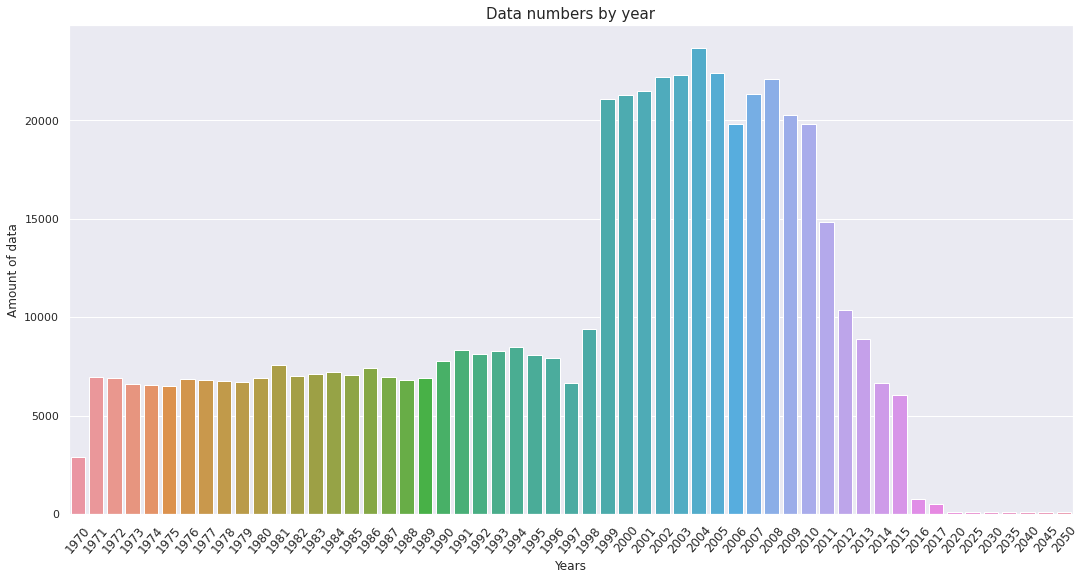

In [47]:
# Graph of amount of data per year
sns.set_style("darkgrid")
plt.figure(figsize=(18, 9))
plt.title("Data numbers by year", size=15)
plot = sns.barplot(y="SeriesCode", x="Year", data=foot_note_copy.groupby("Year").count().reset_index())
plot.set_xticklabels(labels=foot_note_copy.groupby("Year").count().reset_index()["Year"], rotation=50, size=12)
plot.set(xlabel="Years", ylabel="Amount of data")
plt.show()

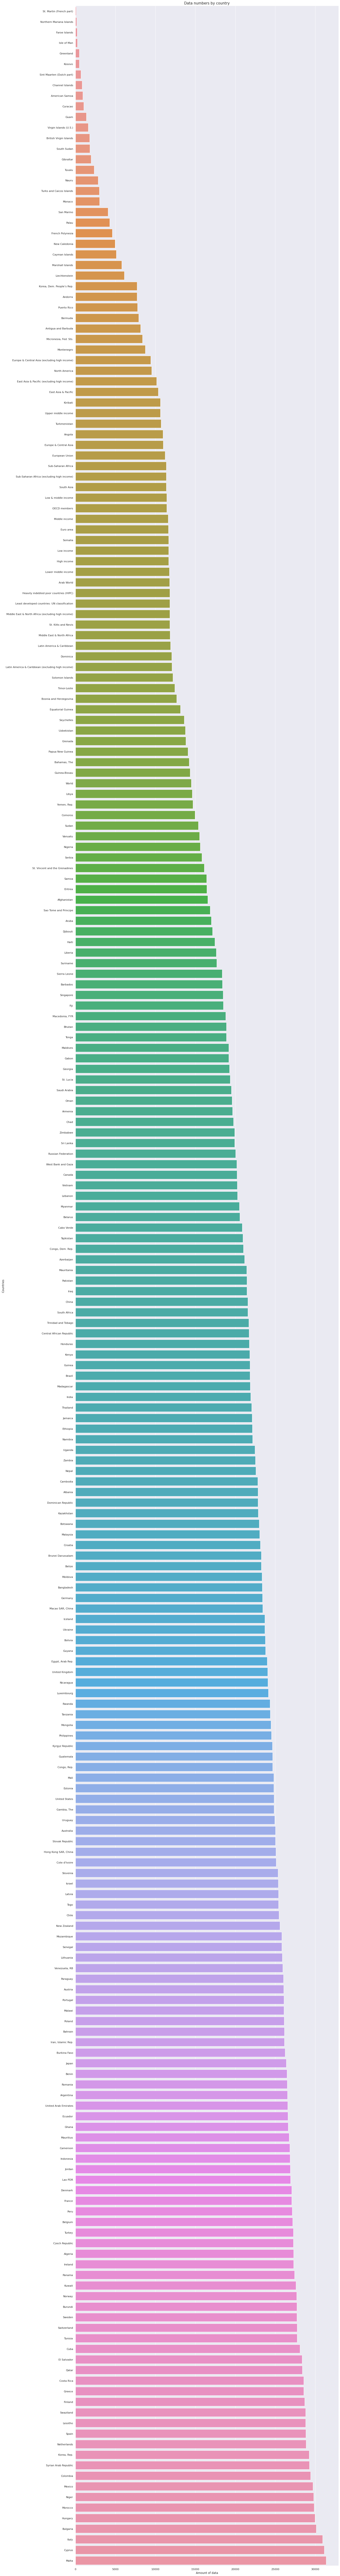

In [48]:
# Graph of amount of data per country
sns.set_style("darkgrid")
plt.figure(figsize=(20, 200))
plt.title("Data numbers by country", size=15)
plot = sns.barplot(x=data.groupby("Country Name")[["1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", 
                                                   "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", 
                                                   "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", 
                                                   "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", 
                                                   "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", 
                                                   "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", 
                                                   "2020", "2025", "2030", "2035", "2040", "2045", "2050"]].count().sum(axis=1).sort_values().values,
                   y=data.groupby("Country Name")[["1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", 
                                                   "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", 
                                                   "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", 
                                                   "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", 
                                                   "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", 
                                                   "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", 
                                                   "2020", "2025", "2030", "2035", "2040", "2045", "2050"]].count().sum(axis=1).sort_values().index
                  )
plot.set(xlabel="Amount of data", ylabel="Countries")
plt.show()

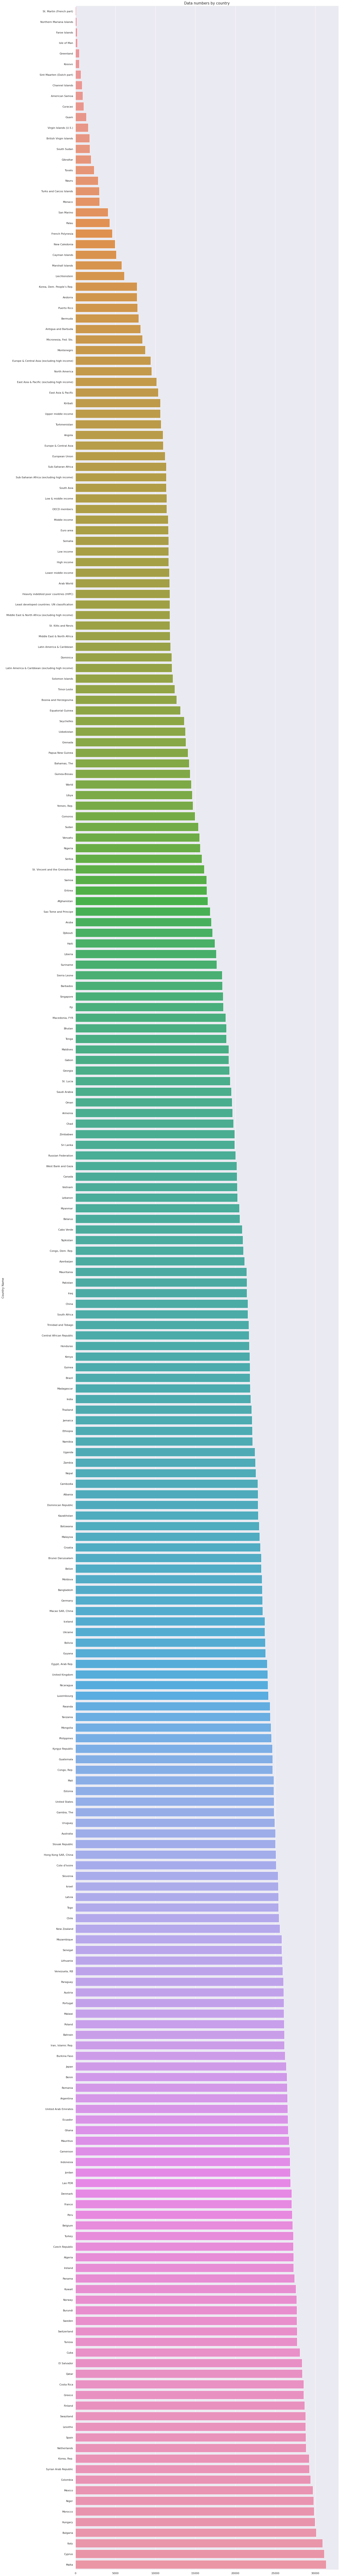

In [49]:
# Graph of amount of data per country
sns.set_style("darkgrid")
plt.figure(figsize=(20, 200))
plt.title("Data numbers by country", size=15)
plot = sns.barplot(x=data.groupby("Country Name")[["1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", 
                                                   "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", 
                                                   "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", 
                                                   "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", 
                                                   "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", 
                                                   "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", 
                                                   "2020", "2025", "2030", "2035", "2040", "2045", "2050"]].count().sum(axis=1).sort_values().values,
                   y=data.groupby("Country Name")[["1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", 
                                                   "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", 
                                                   "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", 
                                                   "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", 
                                                   "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", 
                                                   "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", 
                                                   "2020", "2025", "2030", "2035", "2040", "2045", "2050"]].count().sum(axis=1).sort_values().index
                  )
#plot.set(xlabel="Amount of data", ylabel="Countries")
plt.show()